In [3]:
import pandas as pd
import os
import glob
import datetime
import matplotlib.pyplot as plt

## combining all pbp csv files 

## reading combined csv files

In [4]:
df = pd.read_csv("/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/combined_pbp_csv.csv")

## df exploration

In [6]:
df.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,720,BOS,Jump ball: K. Love vs. A. Horford (K. Irving g...,...,NaN,NaN,NaN,NaN,NaN,NaN,K. Love - loveke01,A. Horford - horfoal01,K. Irving - irvinky01,NaN
1,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,704,BOS,K. Irving makes 2-pt jump shot from 10 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,687,BOS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,683,BOS,Defensive rebound by A. Horford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,681,BOS,G. Hayward misses 3-pt jump shot from 25 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## filtering original csv for necessary player data 

In [8]:
def playerfilter(df, playername):
    #filter for specific values 
    filtcond = df.loc[(df["Quarter"] == 4) & (df["SecLeft"] <= 120) & (df["Shooter"].str.contains(playername))]
    
    #filter for necessary columns
    playerstats = filtcond[["Date","AwayPlay", "HomePlay", "SecLeft","Shooter","ShotOutcome","ShotType"]]
    
    #combining AwayPlay and HomePlay columns
    playerstats.columns = playerstats.columns.str.replace('.*?Play', 'Play', regex = True)

    #stack
    s = playerstats.stack() 
    s

    #unstack
    playerstats = s.unstack()

    #converting date column to a datetime format  
    playerstats['Date'] = pd.to_datetime(df['Date'])
    
    return(playerstats)

## filtering playerstats for specific seasons

In [9]:
#filtering for 2015-2016 season and generating csv file
def filter16(df, filename): 
    start_date = "10-27-2015"
    end_date = "06-19-2016"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats16 = df.loc[mask]
    
    #export playerstats16 to csv 
    name = filename    
    playerstats16.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}16.csv')
    
    return(playerstats16)

In [10]:
#filtering for 2016-2017 season
def filter17(df, filename):
    start_date = "10-25-2016"
    end_date = "06-18-2017"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats17 = df.loc[mask]
    
    #export playerstats17 to csv 
    name = filename
    playerstats17.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}17.csv')
    
    return(playerstats17)

In [11]:
#filtering for 2017-2018 season
def filter18(df, filename):
    start_date = "10-17-2017"
    end_date = "06-17-2018"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats18 = df.loc[mask]
    
    #export playerstats18 to csv 
    name = filename
    playerstats18.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}18.csv')
    
    return(playerstats18)

In [12]:
#filtering for 2018-2019 season
def filter19(df, filename):
    start_date = "10-16-2018"
    end_date = "06-10-2019"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)
    
    playerstats19 = df.loc[mask]

    #export playerstats19 to csv 
    name = filename
    playerstats19.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}19.csv')
    
    return(playerstats19)

In [13]:
#filtering for 2019-2020 season
def filter20(df,filename):
    start_date = "10-22-2019"
    end_date = "10-11-2020"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats20 = df.loc[mask]
    
    #export damestats20 to csv 
    name = filename
    playerstats20.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}20.csv')
  
    return(playerstats20)

In [14]:
#filtering for 2020-2021 season
def filter21(df, filename):
    start_date = "12-22-2020"
    end_date = "07-20-2021"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats21 = df.loc[mask]
    
    # export playerstats21 to csv 
    name = filename
    playerstats21.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}21.csv')
   
    return(playerstats21)

## functions for analysis

In [15]:
#function for calculating 3-pt shot percentage 
def threeptcalc(df):
    
    #filters damestats to show only 3-point attempts
    dt3 = df[df.ShotType.str.contains("3-pt jump shot")]
    
    #number of 3-pointers attempted
    shotattempts3 = len(dt3.index)
    
    #filters dt3 to show only made attempts
    dt3made = dt3[dt3.ShotOutcome.str.contains("make")]
    
    #number of 3-pointers made
    madeshots3 = len(dt3made.index)
    
    if (shotattempts3 == 0):
        rshotper3 = 0       
    else:    
        #3-point shot make percentage 
        shotper3 = madeshots3 / shotattempts3 * 100
    
        #limits the percent to 2 decimal places 
        rshotper3 = round(shotper3, 2)
    
    return(rshotper3)

In [16]:
#function for calculating 2-pt shot percentage
def twoptcalc(df):
    
    #filters damestats to show only 2-point attempts
    dt2 = df[df.ShotType.str.contains("2-pt jump shot")]
    
    #number of 2-pointers attempted
    shotattempts2 = len(dt2.index)
    
    #filters dt2 to show only made attempts
    dt2made = dt2[dt2.ShotOutcome.str.contains("make")]
    
    #number of 2-pointers made
    madeshots2 = len(dt2made.index)
    
    if (shotattempts2 == 0):
        rshotper2 = 0   
    else:    
        #2-point shot make percentage 
        shotper2 = madeshots2 / shotattempts2 * 100
    
        #limits the percent to 2 decimal places 
        rshotper2 = round(shotper2, 2)
    
    return(rshotper2)

In [17]:
#function for calculating lay-up percentage
def layupcalc(df):
    
    #filters damestats to show only layup attempts 
    dtup = df[df.ShotType.str.contains("layup") | df.ShotType.str.contains("dunk")]
    
    #number of layups attempted
    shotattemptsup = len(dtup.index)
    
    #filters dtup to show only made attemtps
    dtupmade = dtup[dtup.ShotOutcome.str.contains("make")]
    
    #number of layups made
    madeshotsup = len(dtupmade.index)
    
    if (shotattemptsup == 0):
        rshotperup = 0
    else:
        #layup shot make percentage
        shotperup = madeshotsup / shotattemptsup * 100
        
        #limits the percent to 2 decimal places
        rshotperup = round(shotperup, 2)
        
    return(rshotperup)

In [29]:
#main function that executes all functions
def main(df):
    
    #execute playerfilter function
    damestats = playerfilter(df,"D. Lillard")
    currystats = playerfilter(df,"S. Curry")
    bookerstats = playerfilter(df,"D. Booker")
    tatumstats = playerfilter(df,"J. Tatum")
    hardenstats = playerfilter(df, "J. Harden")
    mccollumstats = playerfilter(df, "C. McCollum")
    
    #execute seasonfilter functions
    damestats16 = filter16(damestats, "damestats")
    damestats17 = filter17(damestats, "damestats")
    damestats18 = filter18(damestats, "damestats")
    damestats19 = filter19(damestats, "damestats")
    damestats20 = filter20(damestats, "damestats")
    damestats21 = filter21(damestats, "damestats")
    
    currystats16 = filter16(currystats, "currystats")
    currystats17 = filter17(currystats, "currystats")
    currystats18 = filter18(currystats, "currystats")
    currystats19 = filter19(currystats, "currystats")
    currystats20 = filter20(currystats, "currystats")
    currystats21 = filter21(currystats, "currystats")
    
    bookerstats16 = filter16(bookerstats, "bookerstats")
    bookerstats17 = filter17(bookerstats, "bookerstats")
    bookerstats18 = filter18(bookerstats, "bookerstats")
    bookerstats19 = filter19(bookerstats, "bookerstats")
    bookerstats20 = filter20(bookerstats, "bookerstats")
    bookerstats21 = filter21(bookerstats, "bookerstats")
    
    tatumstats16 = filter16(tatumstats, "tatumstats")
    tatumstats17 = filter17(tatumstats, "tatumstats")
    tatumstats18 = filter18(tatumstats, "tatumstats")
    tatumstats19 = filter19(tatumstats, "tatumstats")
    tatumstats20 = filter20(tatumstats, "tatumstats")
    tatumstats21 = filter21(tatumstats, "tatumstats")
    
    hardenstats16 = filter16(hardenstats, "hardenstats")
    hardenstats17 = filter17(hardenstats, "hardenstats")
    hardenstats18 = filter18(hardenstats, "hardenstats")
    hardenstats19 = filter19(hardenstats, "hardenstats")
    hardenstats20 = filter20(hardenstats, "hardenstats")
    hardenstats21 = filter21(hardenstats, "hardenstats")
    
    mccollumstats16 = filter16(mccollumstats, "mccollumstats")
    mccollumstats17 = filter17(mccollumstats, "mccollumstats")
    mccollumstats18 = filter18(mccollumstats, "mccollumstats")
    mccollumstats19 = filter19(mccollumstats, "mccollumstats")
    mccollumstats20 = filter20(mccollumstats, "mccollumstats")
    mccollumstats21 = filter21(mccollumstats, "mccollumstats")
    
    #execute three point calculation
    dame316 = threeptcalc(damestats16)
    dame317 = threeptcalc(damestats17)
    dame318 = threeptcalc(damestats18)
    dame319 = threeptcalc(damestats19)
    dame320 = threeptcalc(damestats20)
    dame321 = threeptcalc(damestats21)
    
    curry316 = threeptcalc(currystats16)
    curry317 = threeptcalc(currystats17)
    curry318 = threeptcalc(currystats18)
    curry319 = threeptcalc(currystats19)
    curry320 = threeptcalc(currystats20)
    curry321 = threeptcalc(currystats21)
    
    booker316 = threeptcalc(bookerstats16)
    booker317 = threeptcalc(bookerstats17)
    booker318 = threeptcalc(bookerstats18)
    booker319 = threeptcalc(bookerstats19)
    booker320 = threeptcalc(bookerstats20)
    booker321 = threeptcalc(bookerstats21)
    
    tatum316 = threeptcalc(tatumstats16)
    tatum317 = threeptcalc(tatumstats17)
    tatum318 = threeptcalc(tatumstats18)
    tatum319 = threeptcalc(tatumstats19)
    tatum320 = threeptcalc(tatumstats20)
    tatum321 = threeptcalc(tatumstats21)
    
    harden316 = threeptcalc(hardenstats16)
    harden317 = threeptcalc(hardenstats17)
    harden318 = threeptcalc(hardenstats18)
    harden319 = threeptcalc(hardenstats19)
    harden320 = threeptcalc(hardenstats20)
    harden321 = threeptcalc(hardenstats21)
    
    mccollum316 = threeptcalc(mccollumstats16)
    mccollum317 = threeptcalc(mccollumstats17)
    mccollum318 = threeptcalc(mccollumstats18)
    mccollum319 = threeptcalc(mccollumstats19)
    mccollum320 = threeptcalc(mccollumstats20)
    mccollum321 = threeptcalc(mccollumstats21)
    
    #execute two point calculation
    dame216 = twoptcalc(damestats16)
    dame217 = twoptcalc(damestats17)
    dame218 = twoptcalc(damestats18)
    dame219 = twoptcalc(damestats19)
    dame220 = twoptcalc(damestats20)
    dame221 = twoptcalc(damestats21)
    
    curry216 = twoptcalc(currystats16)
    curry217 = twoptcalc(currystats17)
    curry218 = twoptcalc(currystats18)
    curry219 = twoptcalc(currystats19)
    curry220 = twoptcalc(currystats20)
    curry221 = twoptcalc(currystats21)
    
    booker216 = twoptcalc(bookerstats16)
    booker217 = twoptcalc(bookerstats17)
    booker218 = twoptcalc(bookerstats18)
    booker219 = twoptcalc(bookerstats19)
    booker220 = twoptcalc(bookerstats20)
    booker221 = twoptcalc(bookerstats21)
    
    tatum216 = twoptcalc(tatumstats16)
    tatum217 = twoptcalc(tatumstats17)
    tatum218 = twoptcalc(tatumstats18)
    tatum219 = twoptcalc(tatumstats19)
    tatum220 = twoptcalc(tatumstats20)
    tatum221 = twoptcalc(tatumstats21)
    
    harden216 = twoptcalc(hardenstats16)
    harden217 = twoptcalc(hardenstats17)
    harden218 = twoptcalc(hardenstats18)
    harden219 = twoptcalc(hardenstats19)
    harden220 = twoptcalc(hardenstats20)
    harden221 = twoptcalc(hardenstats21)

    mccollum216 = twoptcalc(mccollumstats16)
    mccollum217 = twoptcalc(mccollumstats17)
    mccollum218 = twoptcalc(mccollumstats18)
    mccollum219 = twoptcalc(mccollumstats19)
    mccollum220 = twoptcalc(mccollumstats20)
    mccollum221 = twoptcalc(mccollumstats21)
    
    #execute layup calculation
    dameup16 = layupcalc(damestats16)
    dameup17 = layupcalc(damestats17)
    dameup18 = layupcalc(damestats18)
    dameup19 = layupcalc(damestats19)
    dameup20 = layupcalc(damestats20)
    dameup21 = layupcalc(damestats21)
    
    curryup16 = layupcalc(currystats16)
    curryup17 = layupcalc(currystats17)
    curryup18 = layupcalc(currystats18)
    curryup19 = layupcalc(currystats19)
    curryup20 = layupcalc(currystats20)
    curryup21 = layupcalc(currystats21)
    
    bookerup16 = layupcalc(bookerstats16)
    bookerup17 = layupcalc(bookerstats17)
    bookerup18 = layupcalc(bookerstats18)
    bookerup19 = layupcalc(bookerstats19)
    bookerup20 = layupcalc(bookerstats20)
    bookerup21 = layupcalc(bookerstats21)
    
    tatumup16 = layupcalc(tatumstats16)
    tatumup17 = layupcalc(tatumstats17)
    tatumup18 = layupcalc(tatumstats18)
    tatumup19 = layupcalc(tatumstats19)
    tatumup20 = layupcalc(tatumstats20)
    tatumup21 = layupcalc(tatumstats21)
    
    hardenup16 = layupcalc(hardenstats16)
    hardenup17 = layupcalc(hardenstats17)
    hardenup18 = layupcalc(hardenstats18)
    hardenup19 = layupcalc(hardenstats19)
    hardenup20 = layupcalc(hardenstats20)
    hardenup21 = layupcalc(hardenstats21)
    
    mccollumup16 = layupcalc(mccollumstats16)
    mccollumup17 = layupcalc(mccollumstats17)
    mccollumup18 = layupcalc(mccollumstats18)
    mccollumup19 = layupcalc(mccollumstats19)
    mccollumup20 = layupcalc(mccollumstats20)
    mccollumup21 = layupcalc(mccollumstats21)
    
    #print values
    print("DL 3%:" + str(dame316) + "," + str(dame317) + "," + str(dame318) + "," + str(dame319) + "," + str(dame320) + "," + str(dame321))
    print("DL 2%:" + str(dame216) + "," + str(dame217) + "," + str(dame218) + "," + str(dame219) + "," + str(dame220) + "," + str(dame221))
    print("DL up%:" + str(dameup16) + "," + str(dameup17) + "," + str(dameup18) + "," + str(dameup19) + "," + str(dameup20) + "," + str(dameup21))
    print("SC 3%:" + str(curry316) + "," + str(curry317) + "," + str(curry318) + "," + str(curry319) + "," + str(curry320) + "," + str(curry321))
    print("SC 2%:" + str(curry216) + "," + str(curry217) + "," + str(curry218) + "," + str(curry219) + "," + str(curry220) + "," + str(curry221))
    print("SC up%:" + str(curryup16) + "," + str(curryup17) + "," + str(curryup18) + "," + str(curryup19) + "," + str(curryup20) + "," + str(curryup21))
    print("DB 3%:" + str(booker316) + "," + str(booker317) + "," + str(booker318) + "," + str(booker319) + "," + str(booker320) + "," + str(booker321))
    print("DB 2%:" + str(booker216) + "," + str(booker217) + "," + str(booker218) + "," + str(booker219) + "," + str(booker220) + "," + str(booker221))
    print("DB up%:" + str(bookerup16) + "," + str(bookerup17) + "," + str(bookerup18) + "," + str(bookerup19) + "," + str(bookerup20) + "," + str(bookerup21))
    print("JT 3%:" +str(tatum316) + "," + str(tatum317) + "," + str(tatum318) + "," + str(tatum319) + "," + str(tatum320) + "," + str(tatum321))
    print("JT 2%:" +str(tatum216) + "," + str(tatum217) + "," + str(tatum218) + "," + str(tatum219) + "," + str(tatum220) + "," + str(tatum221))
    print("JT up%:" +str(tatumup16) + "," + str(tatumup17) + "," + str(tatumup18) + "," + str(tatumup19) + "," + str(tatumup20) + "," + str(tatumup21))
    print("JH 3%:" +str(harden316) + "," + str(harden317) + "," + str(harden318) + "," + str(harden319) + "," + str(harden320) + "," + str(harden321))
    print("JH 2%:" +str(harden216) + "," + str(harden217) + "," + str(harden218) + "," + str(harden219) + "," + str(harden220) + "," + str(harden221))
    print("JH up%:" +str(hardenup16) + "," + str(hardenup17) + "," + str(hardenup18) + "," + str(hardenup19) + "," + str(hardenup20) + "," + str(hardenup21))
    print("CM 3%:" +str(mccollum316) + "," + str(mccollum317) + "," + str(mccollum318) + "," + str(mccollum319) + "," + str(mccollum320) + "," + str(mccollum321))
    print("CM 2%:" +str(mccollum216) + "," + str(mccollum217) + "," + str(mccollum218) + "," + str(mccollum219) + "," + str(mccollum220) + "," + str(mccollum221))
    print("CM up%:" +str(mccollumup16) + "," + str(mccollumup17) + "," + str(mccollumup18) + "," + str(mccollumup19) + "," + str(mccollumup20) + "," + str(mccollumup21))
    
    #insert values into list  
    main.dame3_list = [dame316,dame317,dame318,dame319,dame320,dame321]
    main.dame2_list = [dame216,dame217,dame218,dame219,dame220,dame221]
    main.dameup_list = [dameup16,dameup17,dameup18,dameup19,dameup20,dameup21]
    main.curry3_list = [curry316,curry317,curry318,curry319,curry320,curry321]
    main.curry2_list = [curry216,curry217,curry218,curry219,curry220,curry221]
    main.curryup_list = [curryup16,curryup17,curryup18,curryup19,curryup20,curryup21]  
    main.booker3_list = [booker316,booker317,booker318,booker319,booker320,booker321]
    main.booker2_list = [booker216,booker217,booker218,booker219,booker220,booker221] 
    main.bookerup_list = [bookerup16,bookerup17,bookerup18,bookerup19,bookerup20,bookerup21]
    main.tatum3_list = [tatum316,tatum317,tatum318,tatum319,tatum320,tatum321]
    main.tatum2_list = [tatum216,tatum217,tatum218,tatum219,tatum220,tatum221]
    main.tatumup_list = [tatumup16,tatumup17,tatumup18,tatumup19,tatumup20,tatumup21]
    main.harden3_list = [harden316,harden317,harden318,harden319,harden320,harden321]
    main.harden2_list = [harden216,harden217,harden218,harden219,harden220,harden221]
    main.hardenup_list = [hardenup16,hardenup17,hardenup18,hardenup19,hardenup20,hardenup21]
    main.mccollum3_list = [mccollum316,mccollum317,mccollum318,mccollum319,mccollum320,mccollum321]
    main.mccollum2_list = [mccollum216,mccollum217,mccollum218,mccollum219,mccollum220,mccollum221]
    main.mccollumup_list = [mccollumup16,mccollumup17,mccollumup18,mccollumup19,mccollumup20,mccollumup21]

In [30]:
main(df)

DL 3%:28.89,15.15,29.63,30.56,33.33,33.33
DL 2%:42.31,40.0,38.89,31.03,37.5,50.0
DL up%:37.04,54.84,55.88,50.0,62.5,100.0
SC 3%:46.0,39.58,55.0,36.84,41.67,71.43
SC 2%:50.0,44.83,0.0,33.33,33.33,100.0
SC up%:76.19,84.21,72.73,47.37,100.0,50.0
DB 3%:36.84,27.03,35.71,30.77,24.14,28.57
DB 2%:23.53,43.24,35.0,61.54,47.62,42.86
DB up%:73.33,60.0,36.36,76.92,75.0,33.33
JT 3%:0,0,54.55,26.67,34.48,25.0
JT 2%:0,0,42.86,45.45,43.75,33.33
JT up%:0,0,68.75,52.0,68.75,66.67
JH 3%:22.22,25.0,31.25,30.65,30.43,25.0
JH 2%:22.22,33.33,22.22,61.9,33.33,100.0
JH up%:68.42,68.75,55.0,65.0,36.36,100.0
CM 3%:43.75,33.33,43.48,33.33,23.08,33.33
CM 2%:37.14,50.0,45.71,51.85,47.37,100.0
CM up%:54.55,75.0,63.16,61.54,66.67,0.0


## line charts

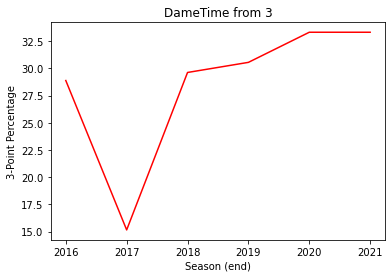

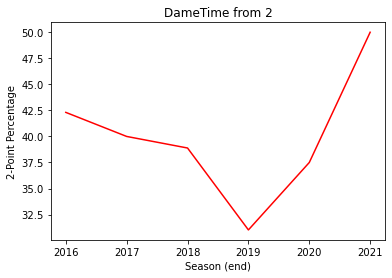

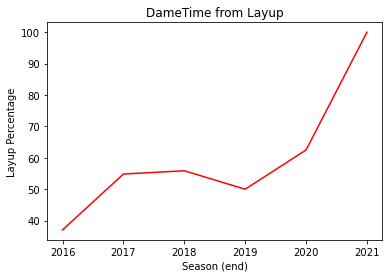

In [52]:
#creating line chart for Damian Lillard 

#creating line chart for 3-pt
season = [2016,2017,2018,2019,2020,2021]

plt.plot(season, main.dame3_list, color = "red")
plt.title('DameTime from 3')
plt.xlabel('Season (end)')
plt.ylabel('3-Point Percentage')
plt.show()
    
#creating line chart for 2-pt
plt.plot(season, main.dame2_list, color = "red")
plt.title('DameTime from 2')
plt.xlabel('Season (end)')
plt.ylabel('2-Point Percentage')
plt.show()

#creating line chart for layup
plt.plot(season, main.dameup_list, color = "red")
plt.title('DameTime from Layup')
plt.xlabel('Season (end)')
plt.ylabel('Layup Percentage')
plt.show()

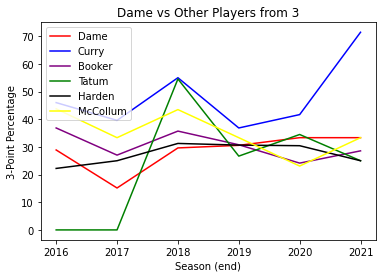

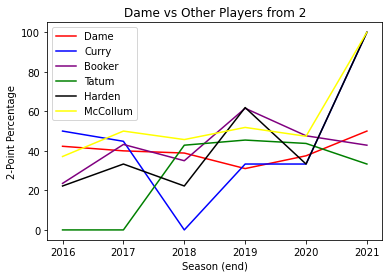

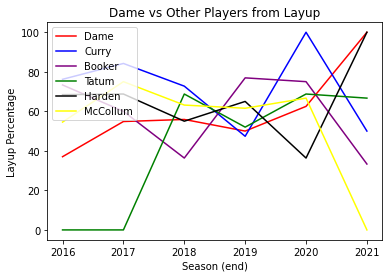

In [31]:
#creating line chart that compares Dame, Curry, and Booker

#creating line chart for 3-pt
season = [2016,2017,2018,2019,2020,2021]

plt.plot(season, main.dame3_list, color = "red", label = "Dame")
plt.plot(season, main.curry3_list, color = "blue", label = "Curry")
plt.plot(season, main.booker3_list, color = "purple", label = "Booker")
plt.plot(season, main.tatum3_list, color = "green", label = "Tatum")
plt.plot(season, main.harden3_list, color = "black", label = "Harden")
plt.plot(season, main.mccollum3_list, color = "yellow", label = "McCollum")
plt.legend(loc = "upper left")
plt.title('Dame vs Other Players from 3')
plt.xlabel('Season (end)')
plt.ylabel('3-Point Percentage')
plt.show()
    
#creating line chart for 2-pt
plt.plot(season, main.dame2_list, color = "red", label = "Dame")
plt.plot(season, main.curry2_list, color = "blue", label = "Curry")
plt.plot(season, main.booker2_list, color = "purple", label = "Booker")
plt.plot(season, main.tatum2_list, color = "green", label = "Tatum")
plt.plot(season, main.harden2_list, color = "black", label = "Harden")
plt.plot(season, main.mccollum2_list, color = "yellow", label = "McCollum")
plt.legend(loc = "upper left")
plt.title('Dame vs Other Players from 2')
plt.xlabel('Season (end)')
plt.ylabel('2-Point Percentage')
plt.show()

#creating line chart for layup
plt.plot(season, main.dameup_list, color = "red", label = "Dame")
plt.plot(season, main.curryup_list, color = "blue", label = "Curry")
plt.plot(season, main.bookerup_list, color = "purple", label = "Booker")
plt.plot(season, main.tatumup_list, color = "green", label = "Tatum")
plt.plot(season, main.hardenup_list, color = "black", label = "Harden")
plt.plot(season, main.mccollumup_list, color = "yellow", label = "McCollum")
plt.legend(loc = "upper left")
plt.title('Dame vs Other Players from Layup')
plt.xlabel('Season (end)')
plt.ylabel('Layup Percentage')
plt.show()

## combining player csvs into one 

In [32]:
path = '/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/McCollumStats'
all_files = glob.glob(os.path.join(path, "*.csv"))

writer = pd.ExcelWriter('McCollumStats.xlsx', engine='xlsxwriter')

for f in all_files:
    df = pd.read_csv(f)
    df.to_excel(writer, sheet_name=os.path.splitext(os.path.basename(f))[0], index=False)

writer.save()